#### Import all the important packages

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.patches as patches
from matplotlib.offsetbox import TextArea, AnchoredOffsetbox
from matplotlib.transforms import TransformedBbox, Bbox
from matplotlib.legend_handler import HandlerBase

from subprocess import check_output


#### Load the Dataset 

In [3]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv",encoding='latin-1')

#### Understand the dataset

In [4]:
car_sales.shape

(9576, 10)

In [5]:
car_sales.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [6]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [7]:
car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [8]:
car_sales.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

#### Pandas Profiling 
#Clean the dataset using the Pandas profiling package so that nulls and unwanted characters, outliers are eliminated

#Run the Pandas pre profiling on the dataset

In [9]:
profile = pp.ProfileReport(car_sales)
profile.to_file("C:\\Users\SHUBHA\\Desktop\\Insaid_Project_1\\car_sales.html")

#### Next Step is to action on the missing values

#### First step is to drop the duplicates to get unique rows

In [10]:
car_sales.drop_duplicates(subset=None, keep='first', inplace=True)

In [11]:
car_sales.drive = car_sales.drive.fillna(car_sales['drive'].mode()[0])

In [12]:
car_sales['engV']=car_sales['engV'].fillna(car_sales['engV'].median())

In [13]:
car_sales['mileage']=car_sales['mileage'].replace(0,car_sales['mileage'].median())

In [14]:
car_sales['price']=car_sales['price'].replace(0,car_sales['price'].median())

In [144]:
car_sales['Expensive'] = car_sales.apply(lambda x: 'Expensive' if x['price'] > 100000 else 'Average',axis=1)

In [16]:
car_sales['count'] = 1

In [145]:
car_sales[car_sales.Expensive=="Expensive"].head()

,car,price,body,mileage,engV,engType,registration,year,model,drive,Expensive,count,Year_bin
16,BMW,129222.0,sedan,2,5.00,Petrol,yes,2016,750,full,Expensive,1,latest
22,BMW,104999.0,crossover,2,3.00,Diesel,yes,2016,X5,full,Expensive,1,latest
29,Mercedes-Benz,105999.0,crossover,129,2.98,Diesel,yes,2016,GLE-Class,full,Expensive,1,latest
39,Mercedes-Benz,200000.0,van,19,3.50,Petrol,yes,2013,Sprinter 324 ïàññ.,rear,Expensive,1,latest
65,Mercedes-Benz,104999.0,crossover,1,3.00,Diesel,yes,2016,GLE-Class,full,Expensive,1,latest


In [143]:
car_sales[car_sales.Expensive=="Expensive"].count().nlargest(5)

car        3
price      3
body       3
mileage    3
engV       3
dtype: int64

In [18]:
car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive,Expensive,count
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,Average,1
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,Average,1
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,Average,1
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,Average,1
4,Mercedes-Benz,33000.0,vagon,91,2.0,Other,yes,2013,E-Class,front,Average,1


In [19]:
car_sales.tail()


,car,price,body,mileage,engV,engType,registration,year,model,drive,Expensive,count
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front,Average,1
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front,Average,1
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full,Average,1
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front,Average,1
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full,Average,1


In [20]:
car_sales.describe()

,price,mileage,engV,year,count
count,9463.000000,9463.000000,9463.000000,9463.000000,9463.0
mean,15537.188707,144.150586,2.612026,2006.525837,1.0
std,22947.612648,95.079722,5.826202,7.062584,0.0
min,259.350000,1.000000,0.100000,1953.000000,1.0
25%,5500.000000,80.000000,1.600000,2004.000000,1.0
50%,9200.000000,129.000000,2.000000,2008.000000,1.0
75%,16500.000000,195.000000,2.500000,2012.000000,1.0
max,547800.000000,999.000000,99.990000,2016.000000,1.0


#### Post Pandas profiling

In [21]:
import pandas_profiling as pp
profile = pp.ProfileReport(car_sales)
profile.to_file("C:\\Users\SHUBHA\\Desktop\\Insaid_Project_1\\car_sales_after_preprocessing.html")

In [22]:
car_sales.hist

<bound method hist_frame of                 car       price       body  mileage  engV engType  \
0              Ford   15500.000  crossover       68  2.50     Gas   
1     Mercedes-Benz   20500.000      sedan      173  1.80     Gas   
2     Mercedes-Benz   35000.000      other      135  5.50  Petrol   
3     Mercedes-Benz   17800.000        van      162  1.80  Diesel   
4     Mercedes-Benz   33000.000      vagon       91  2.00   Other   
5            Nissan   16600.000  crossover       83  2.00  Petrol   
6             Honda    6500.000      sedan      199  2.00  Petrol   
7           Renault   10500.000      vagon      185  1.50  Diesel   
8     Mercedes-Benz   21500.000      sedan      146  1.80     Gas   
9     Mercedes-Benz   22700.000      sedan      125  2.20  Diesel   
10           Nissan   20447.154  crossover      129  1.20  Petrol   
11    Mercedes-Benz   20400.000      sedan      190  1.80     Gas   
12    Mercedes-Benz   22500.000      sedan      164  1.80     Gas   
13    

#### Pandas Profiling completed

In [23]:
print(car_sales)

                car       price       body  mileage  engV engType  \
0              Ford   15500.000  crossover       68  2.50     Gas   
1     Mercedes-Benz   20500.000      sedan      173  1.80     Gas   
2     Mercedes-Benz   35000.000      other      135  5.50  Petrol   
3     Mercedes-Benz   17800.000        van      162  1.80  Diesel   
4     Mercedes-Benz   33000.000      vagon       91  2.00   Other   
5            Nissan   16600.000  crossover       83  2.00  Petrol   
6             Honda    6500.000      sedan      199  2.00  Petrol   
7           Renault   10500.000      vagon      185  1.50  Diesel   
8     Mercedes-Benz   21500.000      sedan      146  1.80     Gas   
9     Mercedes-Benz   22700.000      sedan      125  2.20  Diesel   
10           Nissan   20447.154  crossover      129  1.20  Petrol   
11    Mercedes-Benz   20400.000      sedan      190  1.80     Gas   
12    Mercedes-Benz   22500.000      sedan      164  1.80     Gas   
13              BMW    4700.000   

In [24]:
df =car_sales['year'].value_counts()
print(df)

2008    1150
2007     929
2012     760
2011     691
2013     641
2006     563
2016     415
2005     413
2010     383
2014     354
2009     346
2004     337
2003     282
2015     240
2000     231
2002     219
2001     216
1999     160
1998     152
1996     124
1997     123
1995      85
1994      76
1991      70
1990      64
1992      62
1988      60
1993      53
1989      50
1986      45
1987      43
1985      28
1984      15
1979      10
1982      10
1980       9
1981       8
1978       7
1983       7
1977       6
1976       4
1969       3
1963       2
1974       2
1971       2
1962       2
1961       2
1953       1
1958       1
1970       1
1975       1
1959       1
1964       1
1972       1
1973       1
1968       1
Name: year, dtype: int64


#### Question 1)  Which year had the highest sale

Text(0.5, 1.0, 'Count of Car Sold')

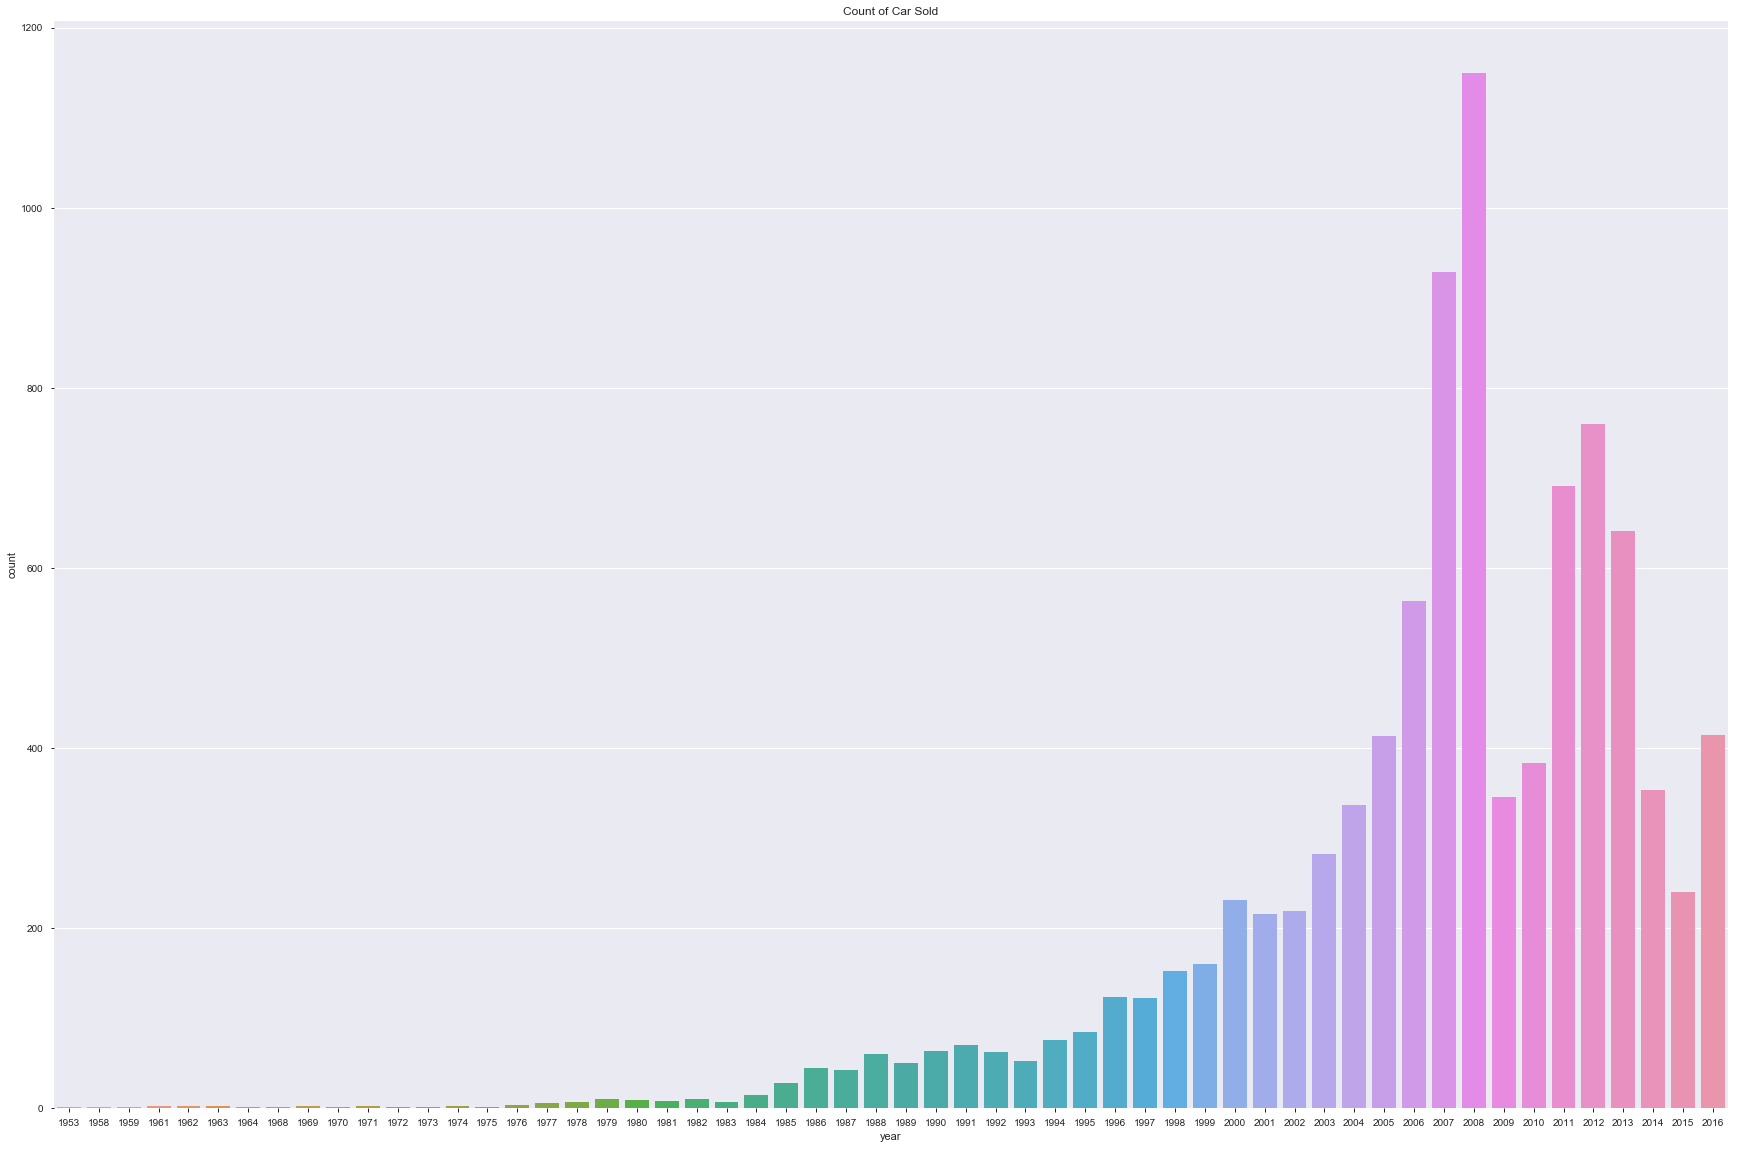

In [25]:
plt.figure(figsize=(30,20))
sns.countplot(x='year', data=car_sales).set_title('Count of Car Sold')


####  Highest sale was recorded in the year 2008

#### Question 2) How was the car sales trend 

In [270]:
car_sales.loc[car_sales['year'] >2000, 'Year_bin']= "latest"
car_sales.loc[car_sales['year']<1980,'Year_bin'] = "Older"
car_sales.loc[((car_sales['year']>1980) & (car_sales['year']<2000)),'Year_bin'] = "Medium"

Year_bin
Medium    1235
Older       49
latest    7939
Name: year, dtype: int64


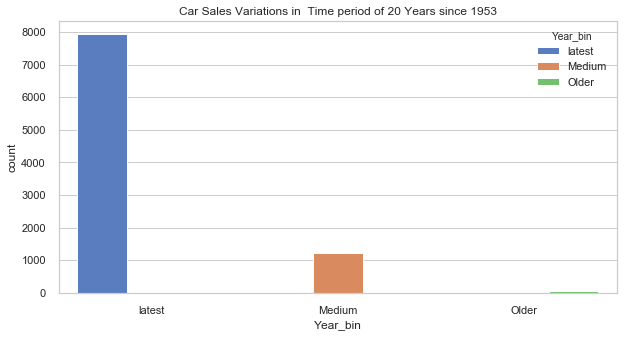

In [271]:
print(car_sales[['year' , 'Year_bin']].groupby('Year_bin')['year'].count())
x1= car_sales[['Year_bin']].groupby('Year_bin').count()

#fig, ax = plt.subplots()

plt.figure(figsize=(10,5))
ax = sns.countplot(x='Year_bin', data=car_sales , hue ='Year_bin').set_title('Car Sales Variations in  Time period of 20 Years since 1953')
handltext = ["Latest", "Medium", "Older"]
labels = ["1953 - 1980", "1980 - 2000", "2000 - 2016"]

plt.show()


#### The above graph shows  the surge in car sales  after year 2000 -  Nearly  8 times  more than  the previous timeframe                                 ( 1980 - 2000) 

#### Question 3) What is the price of cars since 1953

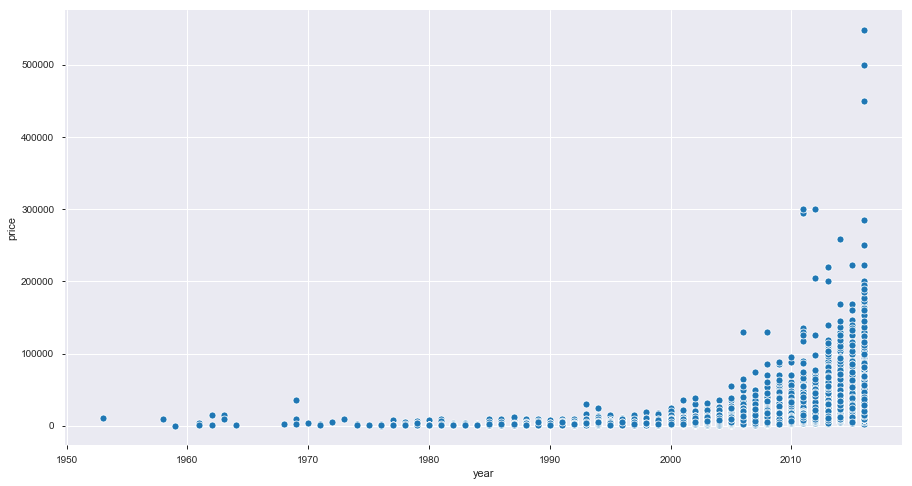

In [26]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="year", y="price", data=car_sales)


####  There has been a steady increase in price between year 1953 and 2000. Price has increased since 2000 and has crossed 10 Lakhs since the year 2011.  There are outliers since 2007 onwards.

#### Question 4) What is the correlation between price, mileage, engine, year

<Figure size 1080x576 with 0 Axes>

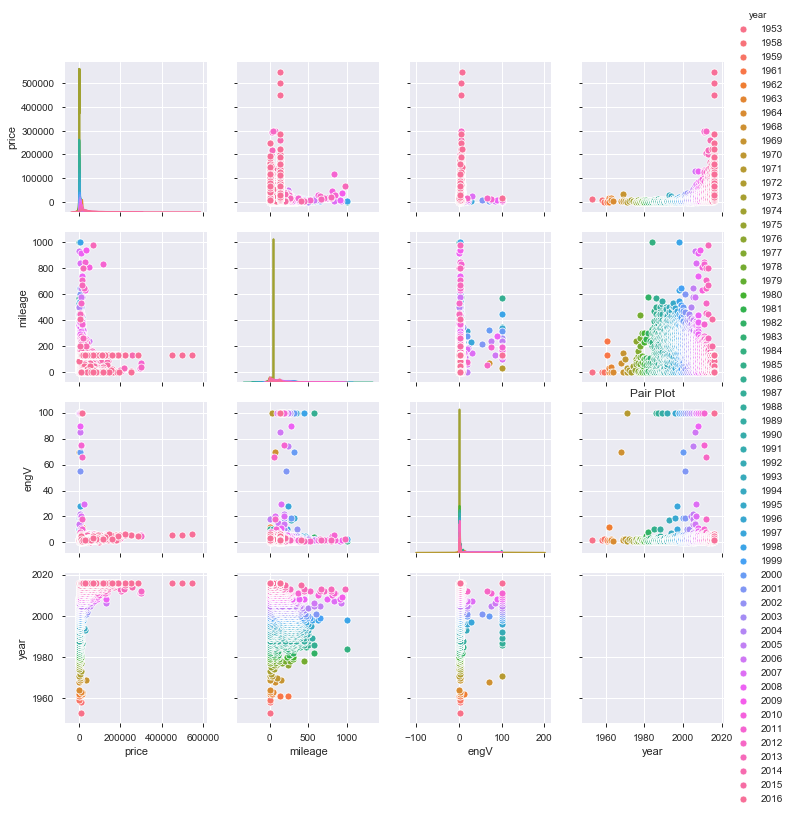

In [220]:
df1=car_sales.groupby(['year']).sum()
plt.figure(figsize=(15,8))
ax = sns.pairplot(car_sales[["price","mileage","engV","year"]],vars = ["price","mileage","engV","year"],hue="year", dropna=True)
plt.title('Pair Plot')
plt.show()

#### Price has increased over the years 2000 onwards. More the mileage more the price

#### Question 5)  Which Engine Type sold the most

engType
Diesel    2950
Gas       1710
Other      462
Petrol    4341
Name: count, dtype: int64
['Gas' 'Petrol' 'Diesel' 'Other']


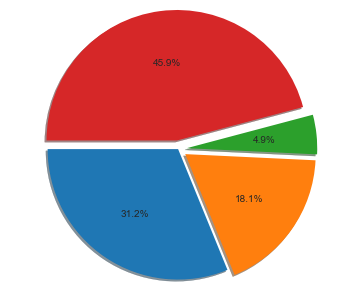

In [155]:
## plt.figure(figsize=(15,8))
x = car_sales['count'].groupby(car_sales['engType']).sum()
label = car_sales['engType'].unique()
print(x)
print(label)
plt.axis("equal")
plt.pie(x,  radius = 1.5,autopct='%1.1f%%',shadow=True,startangle=180,explode=[0,0.1,0.1,0.1])
plt.show()

#### Petrol Engine sale was nearly 50 percent followed by Diesel which was 30 percentage and Gas engine  sale was 15 percentage and Others was 5 percentage

#### Question 6) What is distribution of price

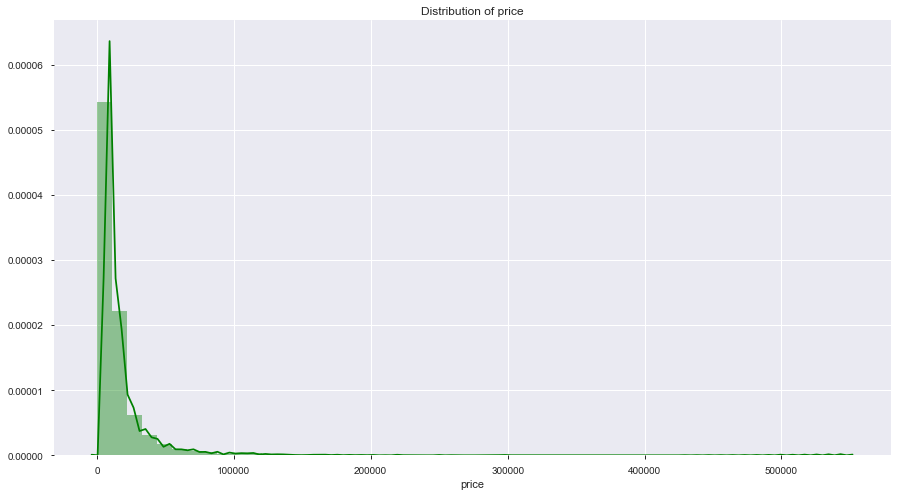

In [91]:

plt.figure(figsize=(15,8))
plt.title('Distribution of price')
sns.distplot(car_sales['price'],color ='g')
plt.show()


#### Price mostly is in the range 0 to 10 lakhs. Very few cars has price range above 100000

#### Question 7) What is the distribution of mileage

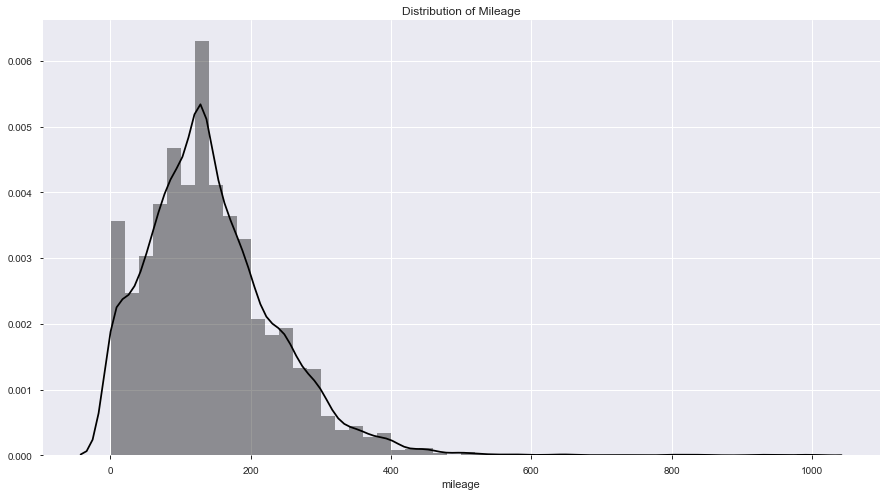

In [94]:

plt.figure(figsize=(15,8))
plt.title('Distribution of Mileage')
sns.distplot(car_sales['mileage'],color ='k')
plt.show()


#### Mileage lies mostly in the range 90 to 250. There has been outliers with mileage 1 , 2 etc that has been recorded

#### Question 8) Which are the years in which maximum car sales happened in descending order

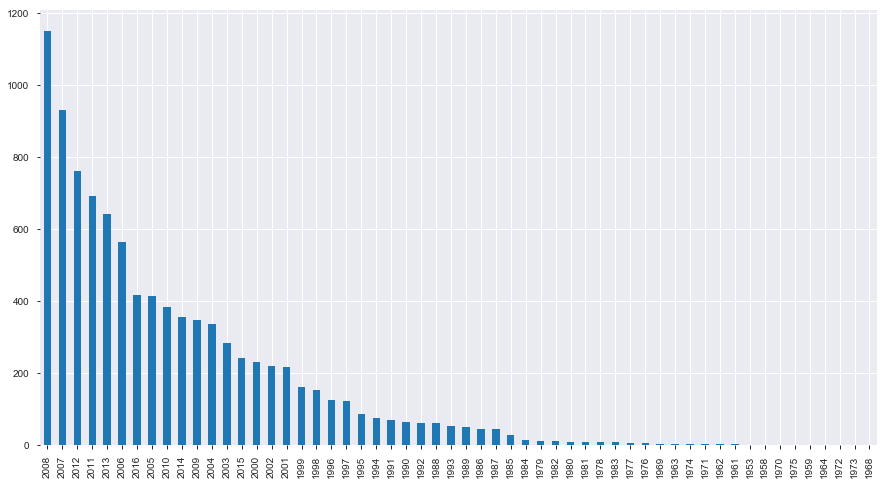

In [142]:
df1 = car_sales.groupby(['model'])['model'].count().nlargest(15)
plt.figure(figsize=(15,8))
df.plot.bar()
plt.show()

#### Years 2008, 2007 and 2012 marked the top 3 sale years

#### Question 9 ) Which model sold most

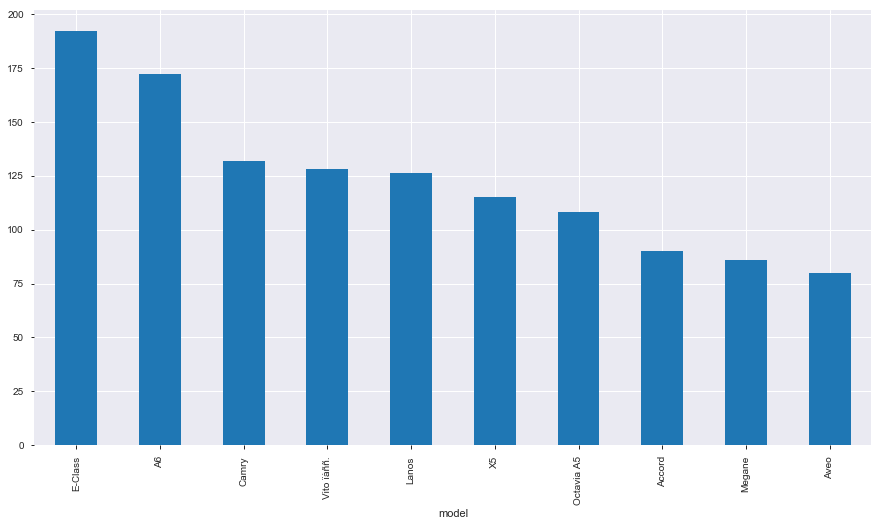

In [107]:
df1 = car_sales.groupby(['model'])['model'].count().nlargest(10)
plt.figure(figsize=(15,8))
df1.plot.bar()
plt.show()

#### Model E-Class was the most popular followed by A6 and Camry in the 2nd and 3rd Position

#### Question 10) What is the correlation between Mileage and EngineType

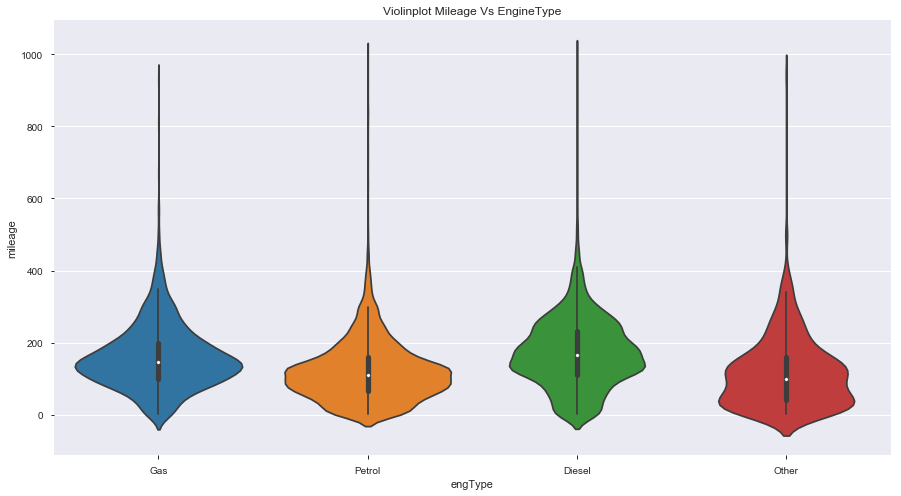

In [119]:
plt.figure(figsize=(15,8))
sns.violinplot('engType','mileage', kind="point" ,data = car_sales)
plt.title('Violinplot Mileage Vs EngineType')
plt.show()

#### Mileage is higher for Diesel Engines and Gas Engines compared to Petrol and Other

#### Question 11) Which cars  sold most based on car size (body)

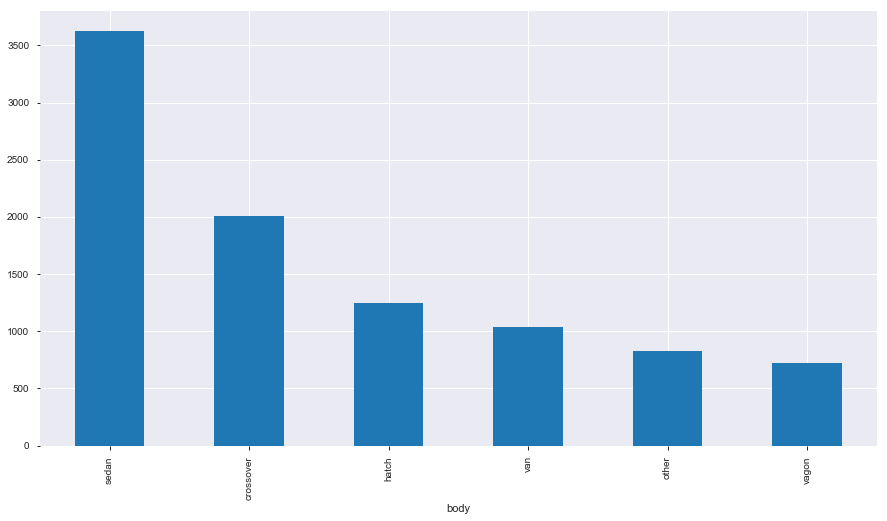

In [122]:
df2 = car_sales.groupby(['body'])['body'].count().nlargest(10)
plt.figure(figsize=(15,8))
df2.plot.bar()
plt.show()

#### Highest body type sold was sedan followed by crossover and hatchback. Vagon was the least sold model

#### Question 12)  What is the percentage of cars in the year_bin that fall in the range "Expensive" and "Average"

<Figure size 1080x576 with 0 Axes>

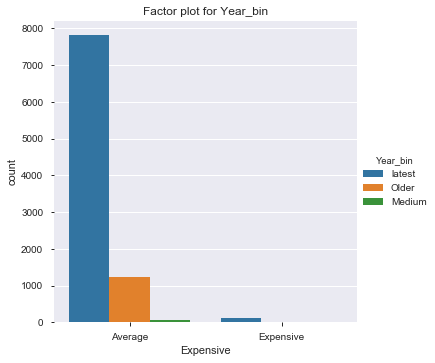

In [146]:
plt.figure(figsize=(15,8))
sns.catplot('Expensive', hue='Year_bin', kind='count', data=car_sales);
plt.title('Factor plot for Year_bin')
plt.show()

#### Mostly expensive cars have been sold after year 2000.  No expensive cars have been sold before year 2000. Expensive car price ranges are > 100000

#### Question 13) What is the proportion of expensive cars that are sold

Expensive
Average      9337
Expensive     126
Name: Expensive, dtype: int64


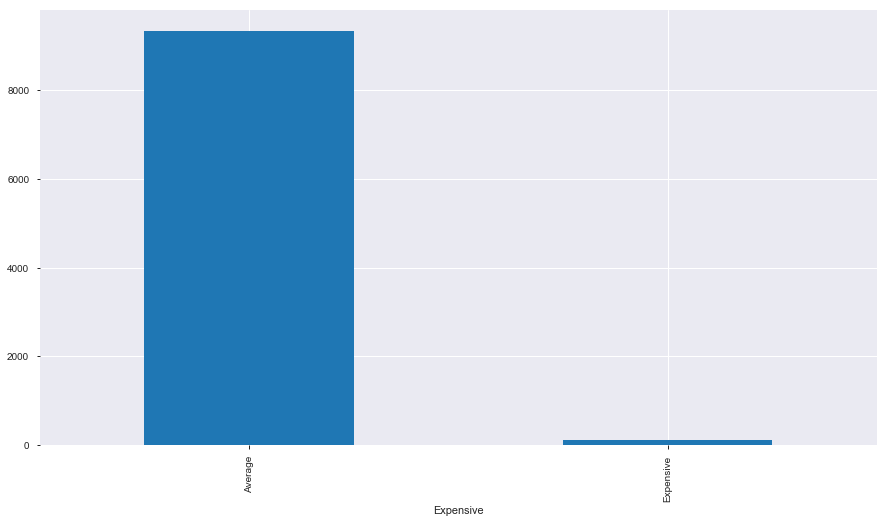

In [154]:
plt.figure(figsize=(15,8))
df4 = car_sales.groupby(['Expensive'])['Expensive'].count().nlargest(10)
df4.plot.bar()
print(df4)

#### Expensive cars that are sold is less than 2 percentage of the total cars that are sold ( Expensive is those cars where price > 100000)

#### Question 14) Which are the expensive branded cars and how many of them sold

Text(0.5, 1.0, 'Count of  Expensive Branded Cars that were Sold')

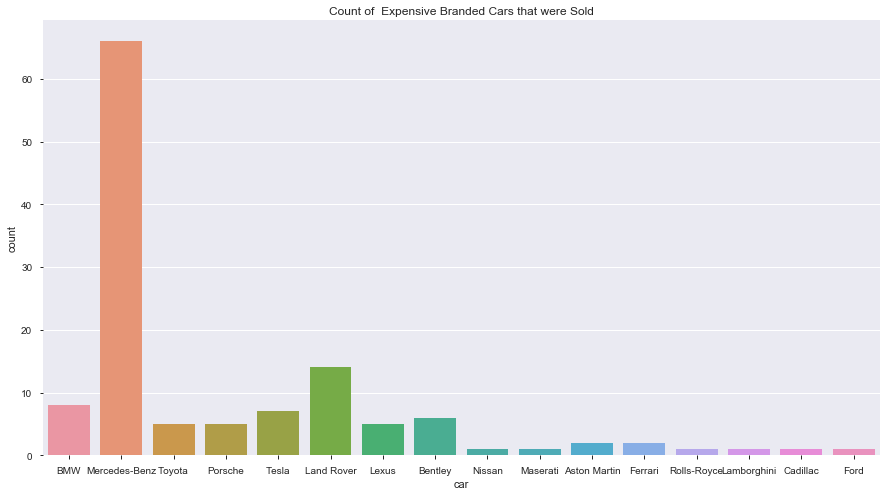

In [178]:
df5 = car_sales[car_sales['Expensive']== "Expensive"]
plt.figure(figsize=(15,8))
sns.countplot(x=df5['car'], data=df5).set_title('Count of  Expensive Branded Cars that were Sold')

####  Mercedes Benz car sold the most in the Expensive variety followed by Land Rover in the second position and BMW. Benz car sale was nearly 5 times more than sale of Land Rover and nearly 8 times more than the sale of BMW. Among the expensive range Nissan, Rolls Royce, Lamborghini, Cadillac and Ford sold least. Medium sales was recorded for Toyota, Porsche , Lexus, Bentley

#### Question 15) What is the price range for the top 3 expensive cars that have been sold

<Figure size 1080x576 with 0 Axes>

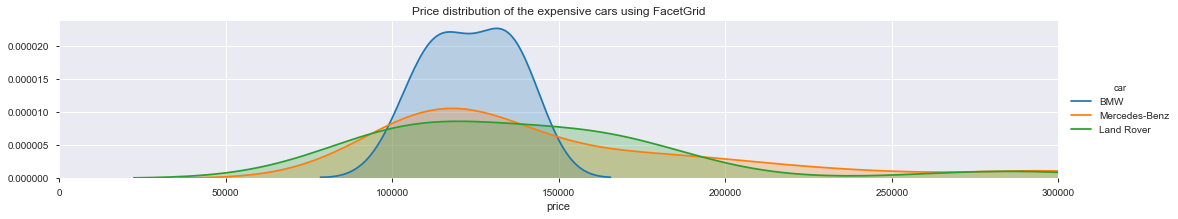

In [215]:
plt.figure(figsize=(15,8))
list =['Mercedes-Benz','Land Rover','BMW']
df6 = df5[df5.car.isin(list)]
as_fig = sns.FacetGrid(df6,hue='car',aspect=5)
as_fig.map(sns.kdeplot,'price',shade=True)
oldest = df6['price'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()
plt.title('Price distribution of the expensive cars with highest sales using FacetGrid')
plt.show()

####  Price varies from 50000 to 300000 for the expensive cars with LandRover starting from a little below 90000 to 30000. Benz price ranges are also quite similar. However BMW price range is from  80000 to 120000. This implies that Land Rover and Mercedes-Benz has more price class with full/medium/start options and various other accessories options. BMW has narrower price distribution and accessories options. BMW pricing is more on a fixed scale. It is therefore observed that the greater prize flexibility the better the sale.

#### Question 16) What is the correlation between wheel drive and engine capacity

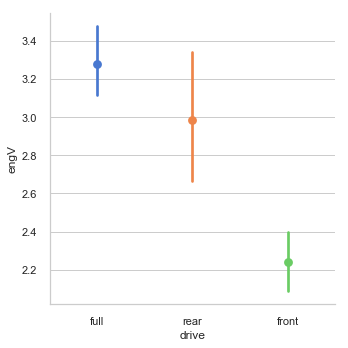

In [241]:
sns.catplot('drive','engV',hue='drive',kind='point',data=car_sales)
plt.show()

#### Full Wheel drive has greater engine capacity followed by rear wheel drive and front wheel drive

#### Question 17)  What is the car sale type based on Wheel Drive

Text(0.5, 1.0, 'Count of Wheel Drives Sold')

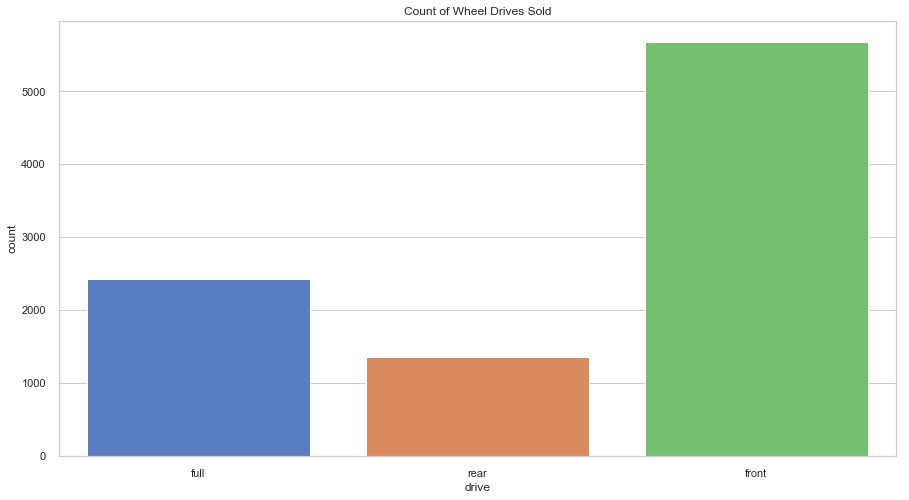

In [235]:
plt.figure(figsize=(15,8))
sns.countplot(x='drive', data=car_sales).set_title('Count of Wheel Drives Sold')

#### Front Wheel has the highest sales followed by Full Wheel and least sale is for Rear Wheel Drive

#### Question 17)  What is the percentage of non registered cars

Text(0.5, 1.0, 'Count of Car Sold')

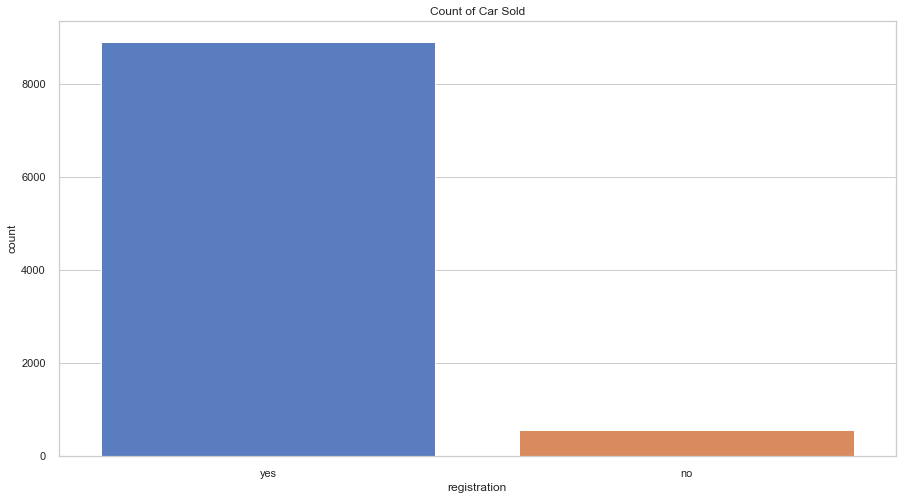

In [242]:
plt.figure(figsize=(15,8))
sns.countplot(x='registration', data=car_sales).set_title('Count of Registered cars')

#### Nearly 2 percentage of cars are not registered. The cars not registered in the country means these have arrived from another country with foreign registration

####  What is the corelation between year, engine capacity, mileage and price

Text(0.5, 1.0, 'Correlation between features')

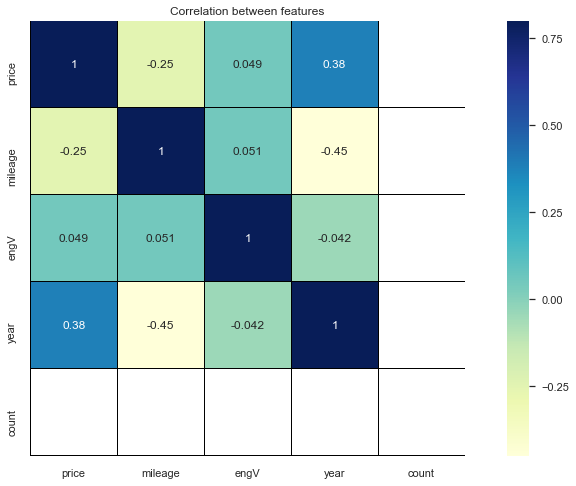

In [268]:
corr = car_sales.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

####
Mileage and Price and  positively corelated with Year
eng capacity  is  negatively corelated with year
There is high corelation between price and year
With high corelation we face redundancy issues

####  Conclusion
Car Sales has increased over the years and a remarkable increase can be seen after the year 2000
Highest sale was recorded in the year 2008
Years 2008, 2007 and 2012 marked the top 3 car sale years
Expensive cars such as Benz, BMW, Land Rover sale has picked up since 2000
Full Wheel drive has greater engine capacity followed by rear wheel drive and front wheel drive
Front Wheel Drive has the highest market value
Sedan, crossover and Hatchback are the highest demand car types
Mileage is higher for Diesel Engines and Gas Engines compared to Petrol and Other
There are few non registered cars from other countries
More the price flexibility and car options, the better the car sales .Example Benz Car Sale
Mercedes Benz is the most popular branded model
Cars with Petrol Engine sale is maximum
Market for Expensive Cars is mostly in the elite class . Average car sale is very high as against branded models
Car Price mostly is in the range < 10 Lakhs. Very few cars of the expensive model has price range   > 10 Lakhs
